In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(2, 211)
(2, 171)
(2, 40)


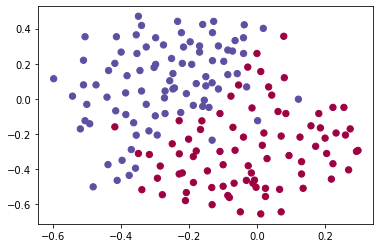

In [35]:
import scipy.io
import matplotlib.pyplot as plt

data = scipy.io.loadmat('/content/drive/MyDrive/CSULB Assignments/CECS 551 ADV AI/Assignment 4/data.mat')
train_X = data['X'].T
train_y = data['y'].T

print(train_X.shape)

train_X = train_X[:, :-40]
train_y = train_y[:, :-40]

print(train_X.shape)

val_X = train_X[:, -40:]
val_y = train_y[:, -40:]

print(val_X.shape)

test_X = data['Xval'].T
test_y = data['yval'].T

plt.scatter(train_X[0, :], train_X[1, :], c=train_y[0, :], s=40, cmap=plt.cm.Spectral);

In [36]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [37]:
data['X'].shape

(211, 2)

In [38]:
data['y'].shape

(211, 1)

In [39]:
data['Xval'].shape

(200, 2)

In [40]:
data['yval'].shape

(200, 1)

b) Designing a neural network

In [41]:
from tensorflow import keras
from tensorflow.keras import optimizers
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(2,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [42]:
# from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [43]:
history = model.fit(train_X.T, train_y.T, validation_data=(val_X.T,val_y.T), epochs=300,  verbose = 2)

Epoch 1/300
6/6 - 1s - loss: 0.6663 - accuracy: 0.5205 - val_loss: 0.6749 - val_accuracy: 0.5000 - 921ms/epoch - 154ms/step
Epoch 2/300
6/6 - 0s - loss: 0.6589 - accuracy: 0.5205 - val_loss: 0.6716 - val_accuracy: 0.5000 - 38ms/epoch - 6ms/step
Epoch 3/300
6/6 - 0s - loss: 0.6528 - accuracy: 0.5205 - val_loss: 0.6688 - val_accuracy: 0.5000 - 54ms/epoch - 9ms/step
Epoch 4/300
6/6 - 0s - loss: 0.6469 - accuracy: 0.5205 - val_loss: 0.6658 - val_accuracy: 0.5000 - 43ms/epoch - 7ms/step
Epoch 5/300
6/6 - 0s - loss: 0.6416 - accuracy: 0.5205 - val_loss: 0.6629 - val_accuracy: 0.5000 - 33ms/epoch - 6ms/step
Epoch 6/300
6/6 - 0s - loss: 0.6360 - accuracy: 0.5322 - val_loss: 0.6597 - val_accuracy: 0.5000 - 37ms/epoch - 6ms/step
Epoch 7/300
6/6 - 0s - loss: 0.6306 - accuracy: 0.5380 - val_loss: 0.6566 - val_accuracy: 0.5000 - 37ms/epoch - 6ms/step
Epoch 8/300
6/6 - 0s - loss: 0.6249 - accuracy: 0.5614 - val_loss: 0.6532 - val_accuracy: 0.5250 - 42ms/epoch - 7ms/step
Epoch 9/300
6/6 - 0s - loss: 

In [44]:
results = model.evaluate(test_X.T, test_y.T)

7/7 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 0.9200


In [45]:
results

[0.29223528504371643, 0.9200000166893005]

## c) Implement a function to draw decision boundary based on training dataset between two classes. 

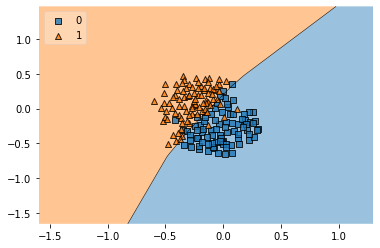

In [46]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(train_X.T, train_y.T.flatten(), clf = model, legend = 2)  

# d) Implement regularization
# Part 1. Implement L2 regularization and tune the hyper-parameters to get higher test accuracy.

In [62]:
model_l2= models.Sequential()
model_l2.add(layers.Dense(8, activation='relu', input_shape=(2,), kernel_regularizer=keras.regularizers.l2(l=0.002)))
model_l2.add(layers.Dense(4, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.002)))
model_l2.add(layers.Dense(4, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.002)))
model_l2.add(layers.Dense(1, activation='sigmoid'))

In [63]:
model_l2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [64]:
history = model_l2.fit(train_X.T, train_y.T, validation_data=(val_X.T,val_y.T), epochs=300,  verbose = 2)

Epoch 1/300
6/6 - 1s - loss: 0.7665 - accuracy: 0.4620 - val_loss: 0.7472 - val_accuracy: 0.4000 - 1s/epoch - 248ms/step
Epoch 2/300
6/6 - 0s - loss: 0.7444 - accuracy: 0.4444 - val_loss: 0.7370 - val_accuracy: 0.4250 - 38ms/epoch - 6ms/step
Epoch 3/300
6/6 - 0s - loss: 0.7292 - accuracy: 0.4912 - val_loss: 0.7287 - val_accuracy: 0.4000 - 35ms/epoch - 6ms/step
Epoch 4/300
6/6 - 0s - loss: 0.7160 - accuracy: 0.5205 - val_loss: 0.7206 - val_accuracy: 0.4500 - 38ms/epoch - 6ms/step
Epoch 5/300
6/6 - 0s - loss: 0.7035 - accuracy: 0.6257 - val_loss: 0.7134 - val_accuracy: 0.5750 - 40ms/epoch - 7ms/step
Epoch 6/300
6/6 - 0s - loss: 0.6919 - accuracy: 0.7135 - val_loss: 0.7066 - val_accuracy: 0.6500 - 34ms/epoch - 6ms/step
Epoch 7/300
6/6 - 0s - loss: 0.6812 - accuracy: 0.8129 - val_loss: 0.6998 - val_accuracy: 0.6500 - 40ms/epoch - 7ms/step
Epoch 8/300
6/6 - 0s - loss: 0.6708 - accuracy: 0.8363 - val_loss: 0.6932 - val_accuracy: 0.6500 - 49ms/epoch - 8ms/step
Epoch 9/300
6/6 - 0s - loss: 0.6

In [65]:
results = model_l2.evaluate(test_X.T, test_y.T)

7/7 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.9250


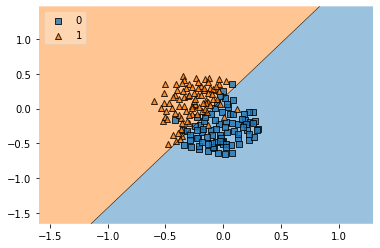

In [66]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(train_X.T, train_y.T.flatten(), clf = model_l2, legend = 2)  

# Part 2. Implement dropout regularization and tune the hyper-parameters to get higher test accuracy.

In [86]:
from keras.layers import Dropout 

model_do = models.Sequential()

model_do.add(layers.Dense(8, activation='relu', input_shape=(2,)))
model_do.add(Dropout(0.25))

model_do.add(layers.Dense(4, activation='relu'))
model_do.add(Dropout(0.25))

model_do.add(layers.Dense(4, activation='relu'))
model_do.add(Dropout(0.25))

model_do.add(layers.Dense(1, activation='sigmoid'))

In [87]:
model_do.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [88]:
history = model_do.fit(train_X.T, train_y.T, validation_data=(val_X.T,val_y.T), epochs=300,  verbose = 2)

Epoch 1/300
6/6 - 1s - loss: 0.6857 - accuracy: 0.4854 - val_loss: 0.6854 - val_accuracy: 0.5000 - 986ms/epoch - 164ms/step
Epoch 2/300
6/6 - 0s - loss: 0.6837 - accuracy: 0.5088 - val_loss: 0.6835 - val_accuracy: 0.5000 - 38ms/epoch - 6ms/step
Epoch 3/300
6/6 - 0s - loss: 0.6761 - accuracy: 0.5789 - val_loss: 0.6823 - val_accuracy: 0.5000 - 42ms/epoch - 7ms/step
Epoch 4/300
6/6 - 0s - loss: 0.6742 - accuracy: 0.5556 - val_loss: 0.6808 - val_accuracy: 0.5000 - 42ms/epoch - 7ms/step
Epoch 5/300
6/6 - 0s - loss: 0.6730 - accuracy: 0.5439 - val_loss: 0.6793 - val_accuracy: 0.5000 - 38ms/epoch - 6ms/step
Epoch 6/300
6/6 - 0s - loss: 0.6742 - accuracy: 0.5380 - val_loss: 0.6780 - val_accuracy: 0.5000 - 38ms/epoch - 6ms/step
Epoch 7/300
6/6 - 0s - loss: 0.6717 - accuracy: 0.5439 - val_loss: 0.6766 - val_accuracy: 0.5000 - 39ms/epoch - 7ms/step
Epoch 8/300
6/6 - 0s - loss: 0.6645 - accuracy: 0.5614 - val_loss: 0.6749 - val_accuracy: 0.5000 - 40ms/epoch - 7ms/step
Epoch 9/300
6/6 - 0s - loss: 

In [89]:
results = model_do.evaluate(test_X.T, test_y.T)

7/7 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.9300


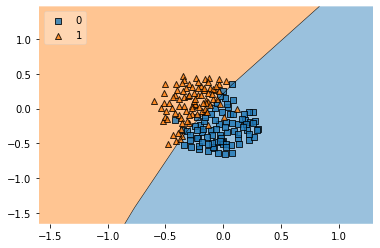

In [90]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(train_X.T, train_y.T.flatten(), clf = model_do, legend = 2)  

# e) Compare the decision boundaries between non-regularization and each regularization.

Text(0.5, 1.0, 'Dropout Regularization')

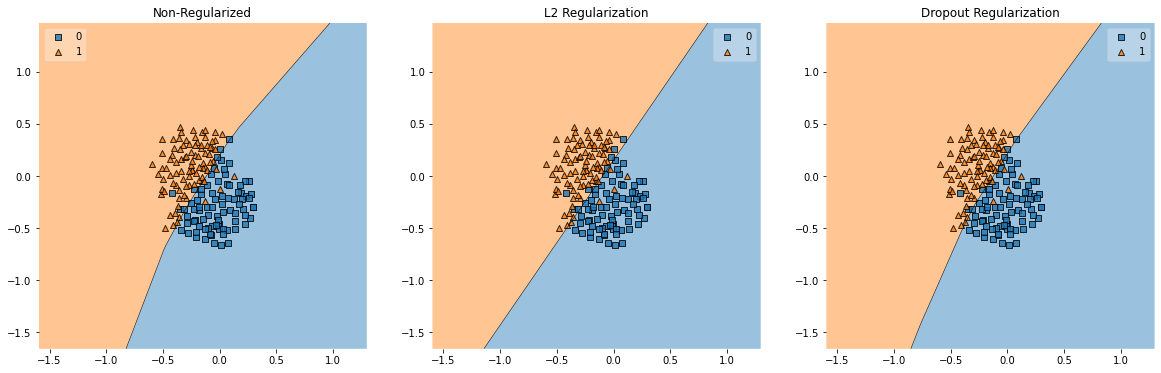

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

fig = plot_decision_regions(train_X.T, train_y.T.flatten(), clf=model, ax=axes[0], legend=2,)
axes[0].set_title('Non-Regularized')

fig = plot_decision_regions(train_X.T, train_y.T.flatten(), clf=model_l2, ax=axes[1], legend=1)
axes[1].set_title('L2 Regularization')

fig = plot_decision_regions(train_X.T, train_y.T.flatten(), clf=model_do, ax=axes[2], legend=1)
axes[2].set_title('Dropout Regularization')
